In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('A:\\ML-Project\\PredictiveMaintenance\\data\\raw\\train.csv')
train_df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
test_df = pd.read_csv("A:\\ML-Project\\PredictiveMaintenance\\data\\raw\\test.csv")
test_df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [4]:
rul_df = pd.read_csv("A:\\ML-Project\\PredictiveMaintenance\\data\\raw\\rul.csv")
rul_df.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [5]:
print(f'RUL{rul_df.sum()}')

RULRUL    7552
dtype: int64


In [6]:
rul_per_engine = train_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul_per_engine.columns = ['unit_number', 'max_cycle']

# Merge with original data
train_df = train_df.merge(rul_per_engine, on='unit_number', how='left')

# Calculate RUL
train_df['RUL'] = train_df['max_cycle'] - train_df['time_in_cycles']
train_df.drop(columns=['max_cycle'], inplace=True)

print(train_df[['unit_number', 'time_in_cycles', 'RUL']].head(10))
train_df.head()

   unit_number  time_in_cycles  RUL
0            1               1  191
1            1               2  190
2            1               3  189
3            1               4  188
4            1               5  187
5            1               6  186
6            1               7  185
7            1               8  184
8            1               9  183
9            1              10  182


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [7]:
train_df.isnull().sum()

unit_number       0
time_in_cycles    0
op_setting_1      0
op_setting_2      0
op_setting_3      0
sensor_1          0
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5          0
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9          0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
RUL               0
dtype: int64

In [8]:
train_df.duplicated().sum()

np.int64(0)

In [9]:
train_df.dtypes

unit_number         int64
time_in_cycles      int64
op_setting_1      float64
op_setting_2      float64
op_setting_3      float64
sensor_1          float64
sensor_2          float64
sensor_3          float64
sensor_4          float64
sensor_5          float64
sensor_6          float64
sensor_7          float64
sensor_8          float64
sensor_9          float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17           int64
sensor_18           int64
sensor_19         float64
sensor_20         float64
sensor_21         float64
RUL                 int64
dtype: object

In [10]:
## these carry same values across all rows so we remove them

constant_cols = [col for col in train_df.columns if train_df[col].nunique() == 1]
constant_cols

['op_setting_3',
 'sensor_1',
 'sensor_5',
 'sensor_10',
 'sensor_16',
 'sensor_18',
 'sensor_19']

In [11]:
train_df.drop(columns=constant_cols, inplace=True)


In [12]:
train_df.head(-1)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,195,-0.0002,-0.0001,643.41,1600.04,1431.90,21.61,551.42,2388.23,9069.69,48.22,519.71,2388.28,8142.90,8.5519,394,38.14,23.1923,5
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2


## Visuals

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

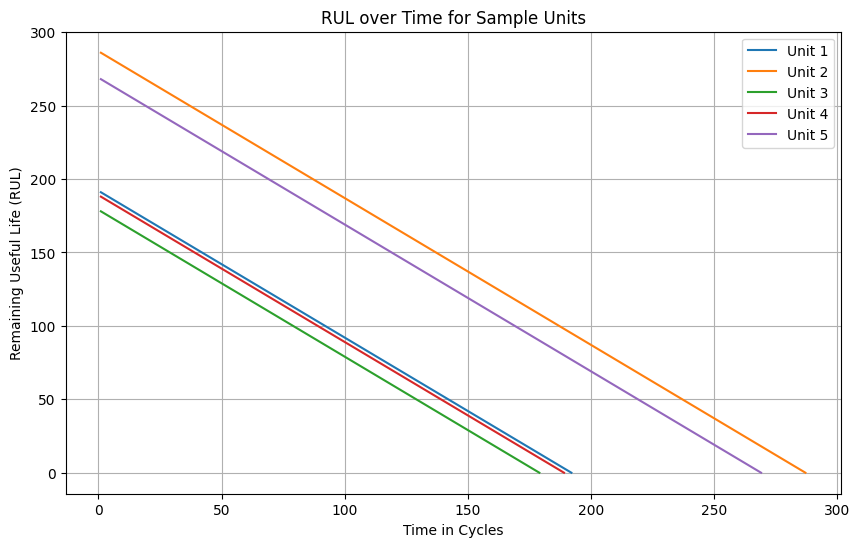

In [14]:
sample_units = train_df["unit_number"].unique()[:5]

plt.figure(figsize=(10, 6))
for unit in sample_units:
    temp = train_df[train_df["unit_number"] == unit]
    plt.plot(temp["time_in_cycles"], temp["RUL"], label=f'Unit {unit}')

plt.xlabel("Time in Cycles")
plt.ylabel("Remaining Useful Life (RUL)")
plt.title("RUL over Time for Sample Units")
plt.legend()
plt.grid(True)
plt.show()

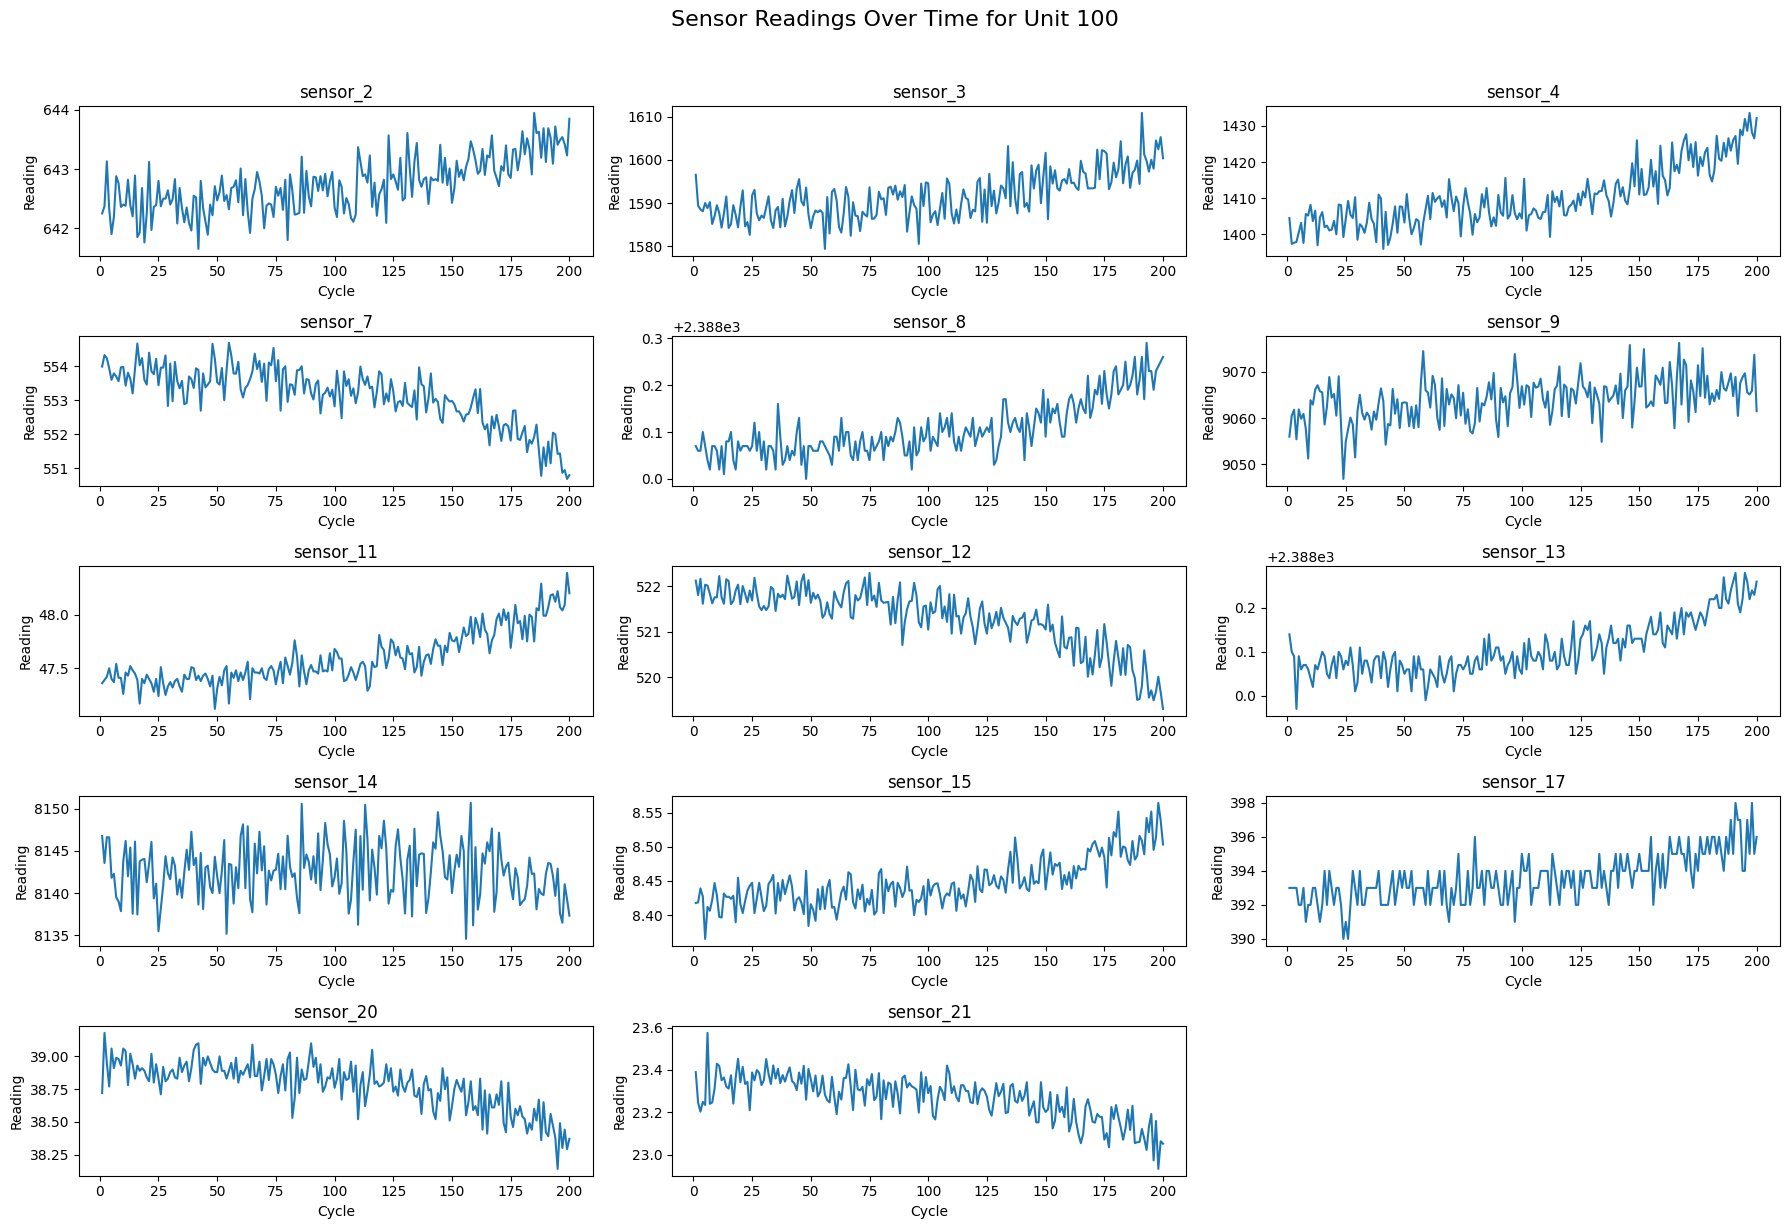

In [ ]:
sensors = [
    "sensor_2", "sensor_3", "sensor_4","sensor_7",
    "sensor_8", "sensor_9", "sensor_11", "sensor_12", "sensor_13",
    "sensor_14", "sensor_15", "sensor_17", "sensor_20", "sensor_21"
]

unit = 100 
unit_data = train_df[train_df["unit_number"] == unit]

plt.figure(figsize=(18, 12)) 

for i, sensor in enumerate(sensors):
    plt.subplot(5, 3, i+1)  
    plt.plot(unit_data["time_in_cycles"], unit_data[sensor])
    plt.title(sensor)
    plt.xlabel("Cycle")
    plt.ylabel("Reading")

plt.suptitle(f"Sensor Readings Over Time for Unit {unit}", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [16]:
train_df = train_df.drop(columns=["sensor_6"], axis=1)
train_df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


## Standardize the data

In [17]:
from sklearn.preprocessing import MinMaxScaler

features = train_df.drop('RUL', axis=1).values
target = train_df['RUL'].values

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


In [18]:
def create_sequences(data, labels, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(labels[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  
X, y = create_sequences(scaled_features, target, window_size)

print(X.shape)  
print(y.shape)

(20601, 30, 18)
(20601,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.2),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

a:\ML-Project\PredictiveMaintenance\venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 128)        │        42,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,777 (327.25 KB)

 Trainable params: 83,777 (327.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    X_train,
    y_train,
    epochs=100,  
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_callback]
)

Epoch 1/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - loss: 10783.3184 - mae: 83.4019 - val_loss: 12251.9941 - val_mae: 85.6871
Epoch 2/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - loss: 7059.3413 - mae: 66.1480 - val_loss: 9061.9434 - val_mae: 73.3689
Epoch 3/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 5325.6968 - mae: 58.3617 - val_loss: 7473.9277 - val_mae: 67.7972
Epoch 4/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 4640.7241 - mae: 55.5375 - val_loss: 6779.8721 - val_mae: 65.6973
Epoch 5/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 4438.0151 - mae: 54.9244 - val_loss: 6517.5610 - val_mae: 65.0521
Epoch 6/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 4388.0005 - mae: 54.8166 - val_loss: 6429.1147 - val_mae: 64.8796
Epoch 7/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 4388.1045 - mae: 54.8978 - val_loss: 6392.3115 - val_mae: 64.8199
Epoch 8/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 4390.2266 - mae: 54.9452 - val_loss

In [ ]:
from sklearn.metrics import r2_score
predictions = model.predict(X_val)
r2 = r2_score(y_val, predictions)

print(f"\nModel's R-squared score on the test set: {r2}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Model's R-squared score on the test set: 0.8767801332473755


In [28]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

print(X_train_flat.shape)

(16480, 540)


In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

def test_regressors(X_train, y_train, X_val, y_val):
    # Initialize the models with default parameters
    models = {
        'RandomForest': RandomForestRegressor(random_state=42),
        'GradientBoosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42, eval_metric='mae'),
        'SVR': SVR(),
        'KNN': KNeighborsRegressor()
    }

    results = []

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        predictions = model.predict(X_val)

        r2 = r2_score(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)

        results.append({
            'Model': name,
            'R2 Score': r2,
            'MAE': mae
        })

    return pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)

evaluation_results = test_regressors(X_train_flat, y_train, X_val_flat, y_val)
print("\nModel Performance Summary:")
print(evaluation_results)

Training RandomForest...
Training GradientBoosting...
Training XGBoost...
Training SVR...
Training KNN...

Model Performance Summary:
              Model  R2 Score        MAE
2           XGBoost  0.563296  39.679047
1  GradientBoosting  0.550964  39.070851
0      RandomForest  0.523842  40.555419
3               SVR  0.514954  41.013796
4               KNN  0.508515  42.066003
